In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Vaishnavi\\Downloads\\spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [5]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
405,ham,"Haha get used to driving to usf man, I know a ...",NaN,NaN,NaN
2968,ham,Ma head dey swell oh. Thanks for making my day,NaN,NaN,NaN
68,spam,"Did you hear about the new \Divorce Barbie\""? ...",NaN,NaN,NaN
974,ham,Eh u send wrongly lar...,NaN,NaN,NaN
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...,NaN,NaN,NaN
2771,ham,Then ur sis how?,NaN,NaN,NaN
2416,ham,"Could you not read me, my Love ? I answered you",NaN,NaN,NaN
1654,ham,"Wishing you and your family Merry \X\"" mas and...",NaN,NaN,NaN
4837,ham,All boys made fun of me today. Ok i have no pr...,NaN,NaN,NaN
5008,ham,My mobile number.pls sms ur mail id.convey reg...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Since very few values are non-null incase of unnamed 2,3,4, we can drop those columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(4)

,v1,v2
745,ham,Dunno he jus say go lido. Same time 930.
3305,ham,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...
4490,ham,"My friend, she's studying at warwick, we've pl..."
498,ham,"Kate jackson rec center before 7ish, right?"


In [10]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
85,ham,"I call you later, don't have network. If urgnt..."
2663,spam,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
3614,ham,I enjoy watching and playing football and bask...
1986,ham,S..antha num corrct dane
4416,ham,says that he's quitting at least5times a day ...


In [11]:
from sklearn .preprocessing import LabelEncoder
en = LabelEncoder()
df['target'] = en.fit_transform(df['target'])

In [12]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#Checking for duplicates
df.duplicated().sum()

403

In [15]:
#dropiing duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
 df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1d728a07b80>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

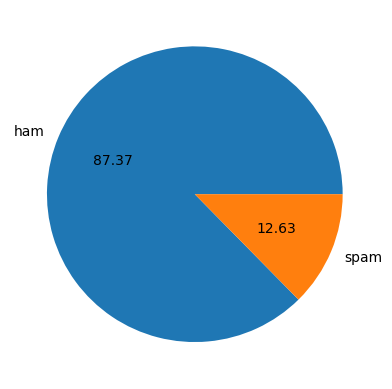

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [20]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_23196\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
import nltk
from nltk import sent_tokenize

In [23]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_23196\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_23196\120005368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#Describing ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#Describing spam
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

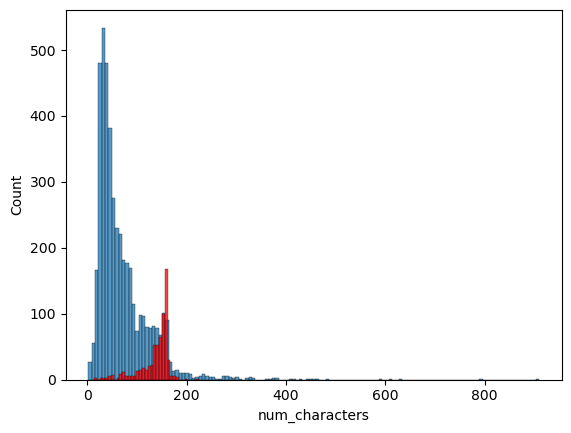

In [30]:
#plotting for ham and spam

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

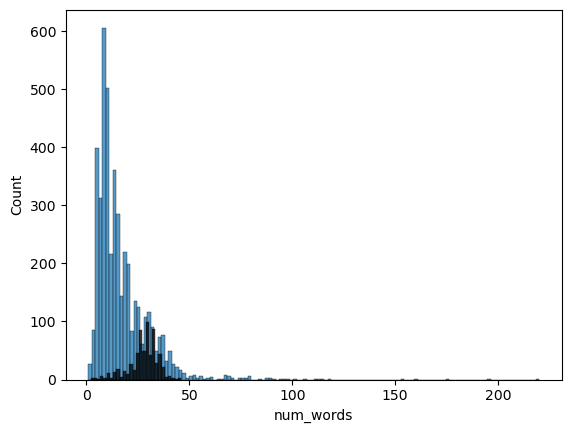

In [31]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'black')

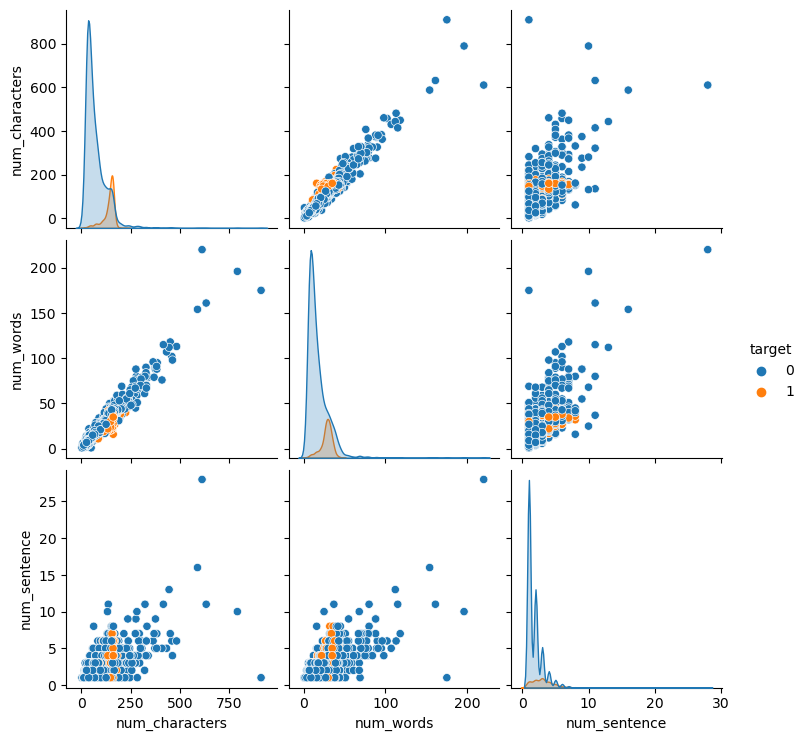

In [32]:
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

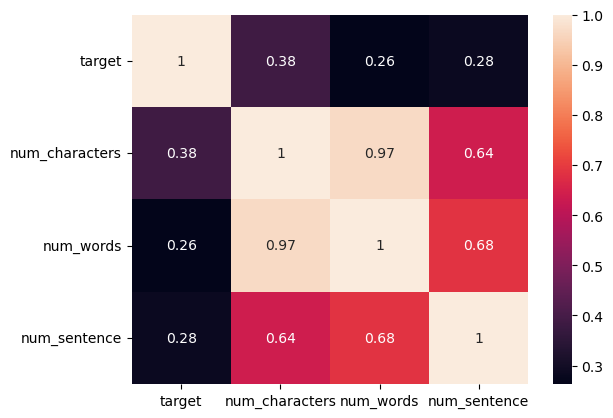

In [33]:
#correlation coefficient
sns.heatmap(df.corr(),annot=True)

In [34]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from wordcloud import WordCloud


In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
 # function to make all lowercase, word tokenization and removing special characters
  
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
        
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
        
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
        
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
ps = PorterStemmer()

In [38]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
#New column creation 
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_23196\3823669910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [40]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
#word cloud for ham and spam
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [42]:
#ham
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) 

In [43]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentence',
       'transformed_text'],
      dtype='object')

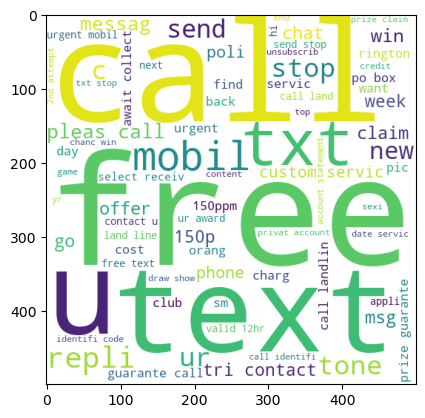

In [44]:
plt.imshow(spam_wc)

In [45]:
#spam
ham_wc =wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

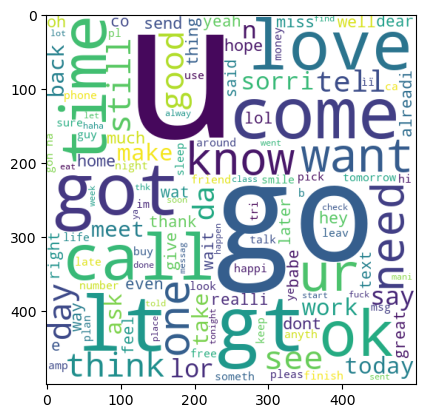

In [46]:
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
#getting the most used words
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [52]:
#model building

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 3000)

In [55]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
mnb = MultinomialNB()

In [68]:
# Multinomial Naive Bayes

mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
